In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [31]:
np.random.seed(42)
num_samples = 3000

In [32]:
pain_scores = np.random.uniform(0, 10, num_samples)
bmi_values = np.random.uniform(15, 40, num_samples)

In [38]:
a, b, c = 0.5, 0.3, 0.2
normalized_bmi = (bmi_values - 15) / 25 * 10
interaction_term = pain_scores * normalized_bmi / 10
stress_levels = a * pain_scores + b * normalized_bmi + c * interaction_term + np.random.normal(0, 0.5, num_samples)
stress_levels = np.clip(stress_levels, 0, 10)

In [39]:
data = pd.DataFrame({
    'Pain': pain_scores,
    'BMI': bmi_values,
    'Stress': stress_levels
})

X = data[['Pain', 'BMI']]
y = data['Stress']

In [40]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [42]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.29


In [43]:
new_data = pd.DataFrame({
    'Pain': [7, 3, 9],   # 통증
    'BMI': [25, 18, 35]  # BMI
})
new_data_scaled = scaler.transform(new_data) 
predicted_stress = model.predict(new_data_scaled)

for i, stress in enumerate(predicted_stress):
    print(f"Input {new_data.iloc[i].values} => Predicted Stress: {stress:.2f}")

Input [ 7 25] => Predicted Stress: 5.31
Input [ 3 18] => Predicted Stress: 1.95
Input [ 9 35] => Predicted Stress: 8.49


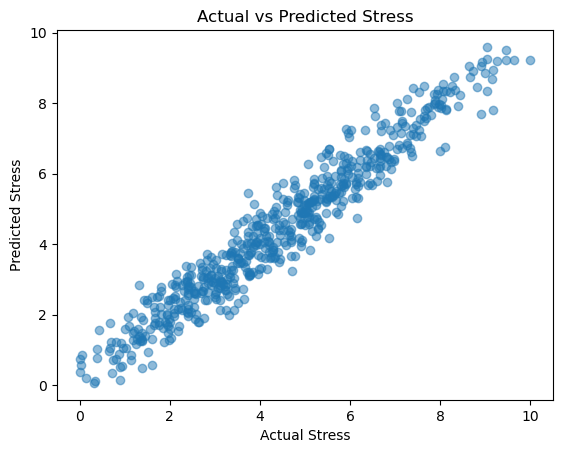

In [44]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Stress")
plt.ylabel("Predicted Stress")
plt.title("Actual vs Predicted Stress")
plt.show()

In [45]:
import joblib

joblib.dump(model, 'stress_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']